# Predicting House Prices

When buying a house, price negotiations are not governed only by the number of rooms the house has. There are many more factors that influence the buyer’s decision and this notebook explores that. There are 79 explanatory variables describing most of the aspects of residential homes in Ames, Iowa. The end goal was to predict the final price of each house, by considering the important features.

## Datasets
This is a Kaggle competition called [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

* **train.csv** - the training set
* **test.csv** - the test set
* **data_description.txt** - full description of each column

## Libraries

In [139]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats
from dataScienceFunctions import *
%matplotlib inline

## Data import and exploration

In [140]:
train = pd.read_csv("./Data/train.csv")
test = pd.read_csv("./Data/test.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [141]:
#df = pd.concat((train.loc[:,'Id':'SaleCondition'], test.loc[:,'Id':'SaleCondition']))
df = train
print(df.columns.values)

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleTy

In [142]:
print('There are: {} duplicates of {} instances'.format(len(set(df.Id))-df.shape[0], df.shape[0]))

There are: 0 duplicates of 1460 instances


In [143]:
numcolmns, catcolmns = separateVars(df)
print('There are ', len(numcolmns), ' numerical variables, and ', len(catcolmns), ' categorical ones. In total: ', len(numcolmns)+len(catcolmns))

There are  38  numerical variables, and  43  categorical ones. In total:  81


## Data manipulation
### Missing values

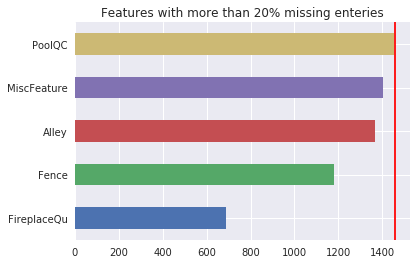

In [144]:
missing = df.isnull().sum()
missing = missing[missing > 0.2*df.shape[0]]
missing.sort_values(inplace=True)
missing.plot(kind='barh', title='Features with more than 20% missing enteries');
plt.axvline(x = df.shape[0], color='r');

In [145]:
df.drop(missing.index.values, axis=1, inplace=True)

### Correlations in numerical variables

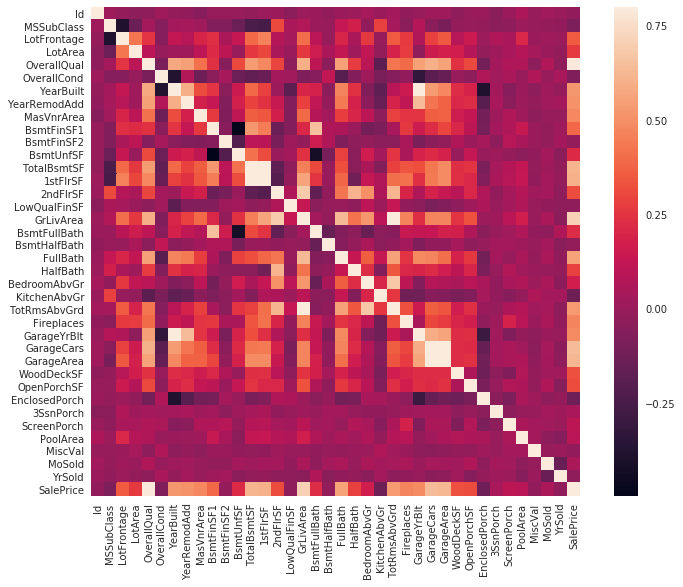

In [146]:
correlation_map = df.corr()
fig, axes = plt.subplots(figsize=(12, 9))
sb.heatmap(correlation_map, vmax=0.8, square=True);

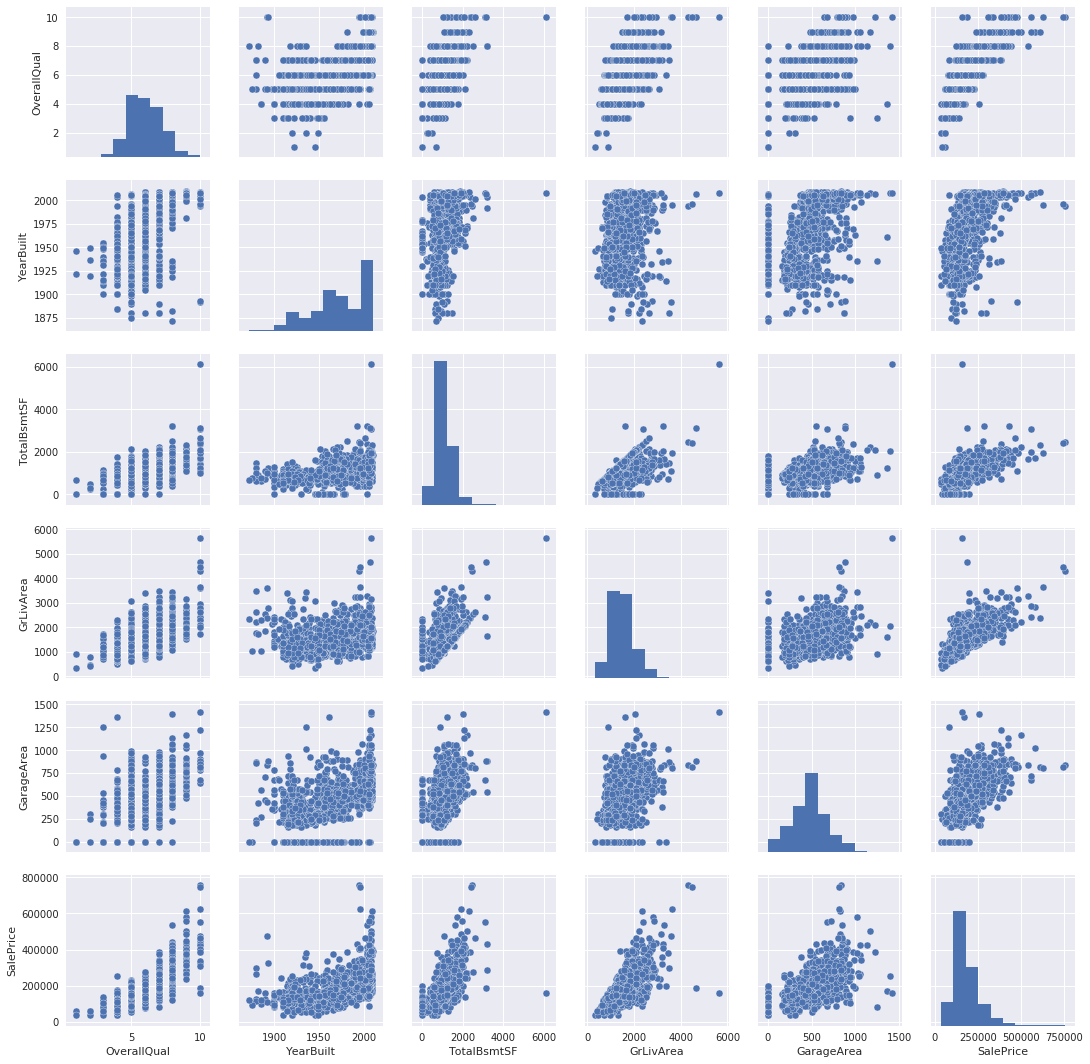

In [147]:
dfNum = df[['OverallQual','YearBuilt','TotalBsmtSF','GrLivArea','GarageArea', 'SalePrice']]
sb.set()
sb.pairplot(dfNum, size=2.5);

### Correlations in categorical variables

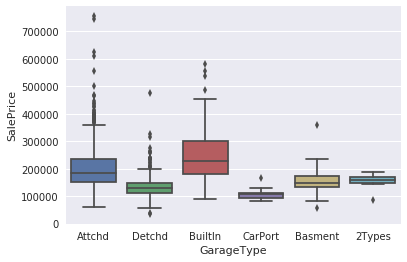

In [148]:
sb.boxplot(x='GarageType', y='SalePrice', data=df);

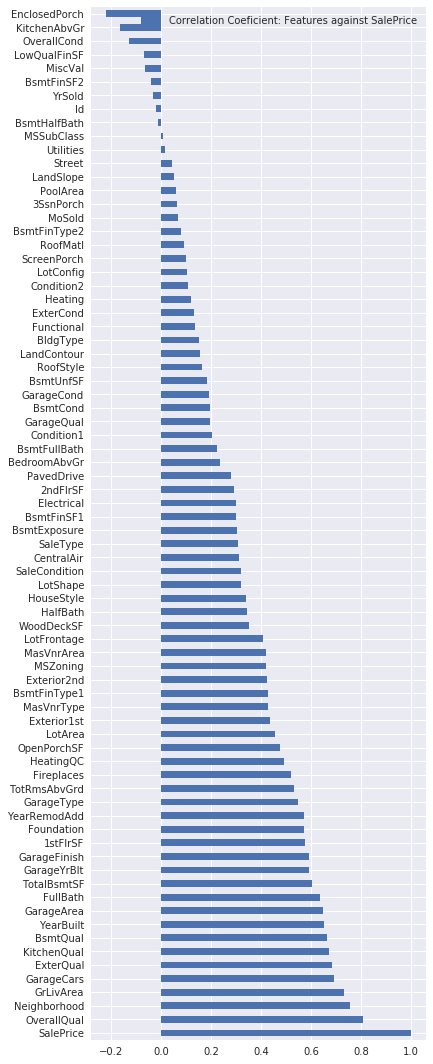

In [149]:
finalDict = categEncoder(df, 'SalePrice')

correlation_map = df.corr('spearman')
corrMap = correlation_map.sort_values(["SalePrice"], ascending = False, inplace = False)
corrdf = pd.DataFrame(corrMap.SalePrice)
corrdf.columns = ['Correlation Coeficient: Features against SalePrice']
corrdf.plot(kind='barh', figsize=(6,len(corrMap.SalePrice)/4));

In [150]:
selects = corrMap.SalePrice[abs(corrMap.SalePrice) > 0.6].index.values
df = df[selects]
df.head()

,SalePrice,OverallQual,Neighborhood,GrLivArea,GarageCars,ExterQual,KitchenQual,BsmtQual,YearBuilt,GarageArea,FullBath,TotalBsmtSF
0,208500,7,17,1710,2,3,3,3.0,2003,548,2,856
1,181500,6,21,1262,2,2,2,3.0,1976,460,2,1262
2,223500,7,17,1786,2,3,3,3.0,2001,608,2,920
3,140000,7,18,1717,3,2,3,2.0,1915,642,1,756
4,250000,8,25,2198,3,3,3,3.0,2000,836,2,1145


### Removing outliers

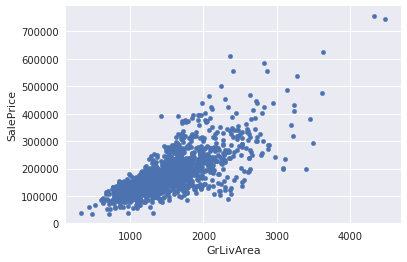

In [151]:
outliers = df.sort_values(by='GrLivArea', ascending=False)[:2].index.values
df = df.drop(df.index[outliers])
df.plot.scatter(x='GrLivArea', y='SalePrice');

### Normalization

Skewness before: 1.88, and skewness after the transformation: 0.12


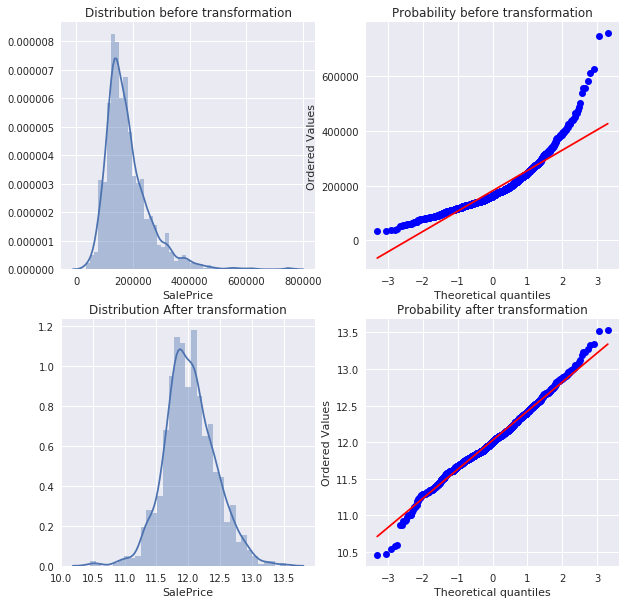

In [152]:
fig, axes = plt.subplots(figsize=(10,10), nrows=2, ncols=2);

axes[0, 0].set_title('Distribution before transformation');
sb.distplot(dfNum['SalePrice'], ax=axes[0, 0]);
stats.probplot(dfNum['SalePrice'], plot=axes[0, 1]);
axes[0, 1].set_title('Probability before transformation');

dfNumNorm = dfNum.copy()
dfNumNorm['SalePrice'] = np.log(dfNumNorm['SalePrice'])

axes[1, 0].set_title('Distribution After transformation');
sb.distplot(dfNumNorm['SalePrice'], ax=axes[1, 0]);
stats.probplot(dfNumNorm['SalePrice'], plot=axes[1, 1]);
axes[1, 1].set_title('Probability after transformation');

print('Skewness before: {:.2f}, and skewness after the transformation: {:.2f}'.format(dfNum['SalePrice'].skew(), dfNumNorm['SalePrice'].skew()))

The features that do not follow normal distribution muse be transformed in order to use regression. Log transformations do a nice job.

In [153]:
skewness = df.apply(lambda x: x.skew())
skewness = skewness[abs(skewness) > 0.5]
skewedVariables = skewness.index
df[skewedVariables] = np.log1p(df[skewedVariables])

### Cleaning and setting up data

#### Test data encoding and selecting

In [154]:
selectsTest = np.setdiff1d(selects,'SalePrice')
test = test[selectsTest]
for i in np.intersect1d(selectsTest, catcolmns):
    dictTest = finalDict[i]
    test.replace(dictTest, inplace=True)

In [155]:
y = df.SalePrice
df.drop('SalePrice', axis=1, inplace=True)

In [156]:
skewedVariablesTest = np.setdiff1d(skewedVariables,'SalePrice')
test[skewedVariablesTest] = np.log1p(test[skewedVariablesTest])
test = test[df.columns]
test.head()

,OverallQual,Neighborhood,GrLivArea,GarageCars,ExterQual,KitchenQual,BsmtQual,YearBuilt,GarageArea,FullBath,TotalBsmtSF
0,5,11,6.799056,1.0,1.098612,2.0,2.0,7.581720,730.0,1,6.783325
1,6,11,7.192934,1.0,1.098612,3.0,2.0,7.580189,312.0,1,7.192934
2,5,15,7.396335,2.0,1.098612,2.0,3.0,7.599902,482.0,2,6.834109
3,6,15,7.380879,2.0,1.098612,3.0,2.0,7.600402,470.0,2,6.831954
4,8,23,7.155396,2.0,1.386294,3.0,3.0,7.597396,506.0,2,7.155396


### Missing values

In [157]:
fillinMostFrequent(df)

Filling out the following columns: 
BsmtQual    37
dtype: int64
Done...
The following columns have missing values: 
Series([], dtype: int64)


In [158]:
fillinMostFrequent(test)

Filling out the following columns: 
GarageCars      1
KitchenQual     1
BsmtQual       44
GarageArea      1
TotalBsmtSF     1
dtype: int64
Done...
The following columns have missing values: 
Series([], dtype: int64)


## Modeling

In [159]:
from sklearn.linear_model import RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.3, random_state = 0)

model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(df, y)
print('LassoCV RMSE: training: {:.4f}, testing: {:.4f}'.format(rmse_cv(model_lasso, X_train, y_train).mean(), rmse_cv(model_lasso, X_test, y_test).mean()))
model_ridge = RidgeCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(df, y)
print('RidgeCV RMSE: training: {:.4f}, testing: {:.4f}'.format(rmse_cv(model_ridge, X_train, y_train).mean(), rmse_cv(model_ridge, X_test, y_test).mean()))
model_lassolars = LassoLarsCV().fit(df, y)
print('LassoLarsCV RMSE: training: {:.4f}, testing: {:.4f}'.format(rmse_cv(model_lassolars, X_train, y_train).mean(), rmse_cv(model_lassolars, X_test, y_test).mean()))
model_elasticnet = ElasticNet().fit(df, y)
print('ElasticNet RMSE: training: {:.4f}, testing: {:.4f}'.format(rmse_cv(model_elasticnet, X_train, y_train).mean(), rmse_cv(model_elasticnet, X_test, y_test).mean()))


LassoCV RMSE: training: 0.1583, testing: 0.1456
RidgeCV RMSE: training: 0.1581, testing: 0.1456
LassoLarsCV RMSE: training: 0.1578, testing: 0.1457
ElasticNet RMSE: training: 0.2585, testing: 0.2546


#### Choosing RidgeCV model

In [162]:
y_test_pred = model_ridge.predict(test)
testData = pd.read_csv("./Data/test.csv")
testData['SalePrice'] = np.expm1(y_test_pred)
testData.to_csv('./Data/submission.csv', index=False, columns=['Id', 'SalePrice'])

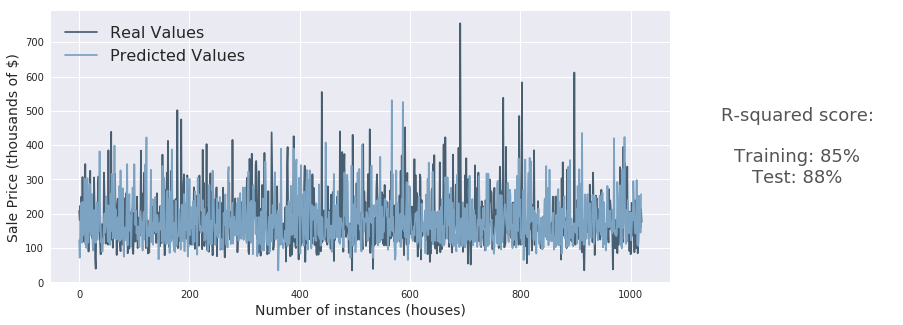

In [161]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(15,5))
gs = gridspec.GridSpec(1, 4)
ax1 = plt.subplot(gs[0:-1])
plt.plot(np.expm1(y[:X_train.shape[0]]), '#485f72', label='Real Values')
plt.plot(np.expm1(model_ridge.predict(X_train)), '#7ca3c2', label='Predicted Values')
plt.ylabel('Sale Price (thousands of $)', fontsize=14)
plt.xlabel('Number of instances (houses)', fontsize=14)
plt.yticks(range(0, 800000, 100000),range(0, 800, 100) )
plt.legend(loc='upper left', fontsize=16)
ax2 = plt.subplot(gs[-1])
ax2.annotate('R-squared score:\n\nTraining: {:.0f}%\nTest: {:.0f}%'.format(100*model_ridge.score(X_train, y_train), 100*model_ridge.score(X_test, y_test)),xy=(0.5, 0.5), xycoords='axes fraction',va='center', ha='center', fontsize=18, color='#525456')
plt.axis('off')
plt.show()